# Machine Learning Computer Homework 3
# Mehran Mazaheri 98102346
## Handwritten image classification
## Part 2: Neural Network
Neural networks make basis for very complex AI models, which we use nowadays, like speech recognizers on smartphones or Google’s latest automatic translator.\
Deep learning is in fact a new name for an approach to artificial intelligence called neural networks, which have been going in and out of fashion for more than 70 years. Neural networks were first proposed in 1944 by Warren McCullough and Walter Pitts, two University of Chicago researchers who moved to MIT in 1952 as founding members of what’s sometimes called the first cognitive science department. \
In this part, we want to design a neural network to classify handwritten images (same job as SVM in part1)


## Using simple dataset from sklearn (40 pts)
### Q1. Split train and test (5)
Split 20 percent of data as test set, and 80 percent for train set. \
Why we don't use whole dataset as training set?

answer: because the model must be examined after trainging, and this needs labeled data which don't affect model in training.

In [1]:
# Import datasets, classifiers and performance metrics
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
#Loading digits dataset from sklearn preloaded datasets
digits = datasets.load_digits()
#TODO
data = digits.images.reshape(len(digits.images), -1)
[X_train, X_test, y_train, y_test] = train_test_split(data, digits.target, train_size=0.8)

### Q2 . Design Neural network (30)
try to design a neural network with not more than 2 hidden layers. you should reach higher accurecies with simpler networks. \
Try different learning rates, activation functions, hidden layers and other parameters to reach at least 90% accuracy (you will calculate accuracy in the next part). \
layers:
- an input layer, with 64 nodes, one node per pixel in the input images. Nodes are neurons that actually do nothing. They -  just take their input value and send it to the neurons of the next layer
-hidden layers: you have to design these.
-an output layer with 10 neurons corresponding to our 10 classes of digits, from 0 to 9.

In [15]:
from sklearn.neural_network import MLPClassifier
#TODO
mlp = MLPClassifier(hidden_layer_sizes=(32,16,),
                    solver='adam',
                    activation='relu',
                    #learning_rate='constant',
                    learning_rate_init=0.005,
                    #epsilon=1e-10,
                    n_iter_no_change=100,
                    #warm_start=True
                    )

fit the designed dataset:

In [16]:
#TODO
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 16), learning_rate_init=0.005,
              n_iter_no_change=100)

### Q3. Model statistics (5)
Here we want to see how good our model is! for this, we try to calculate accuracy, precision, recall and ... \
First try to predict results of the test set, and calculate the accuracy using the predicted labels with given groundtruth labels:

In [17]:
# Use metrics.classification_report() method to get an overview of model's performance
#TODO
y_pred = mlp.predict(X_test)

In [18]:
print(
    f"Classification report for classifier {mlp}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(32, 16), learning_rate_init=0.005,
              n_iter_no_change=100):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.93      0.93      0.93        42
           2       0.93      1.00      0.96        27
           3       0.94      0.97      0.95        31
           4       0.97      0.93      0.95        40
           5       0.95      0.91      0.93        44
           6       1.00      1.00      1.00        36
           7       0.92      0.97      0.94        35
           8       0.97      0.92      0.94        36
           9       0.95      0.95      0.95        39

    accuracy                           0.95       360
   macro avg       0.95      0.96      0.95       360
weighted avg       0.95      0.95      0.95       360




To see more details of the result, plot confusion matrix:

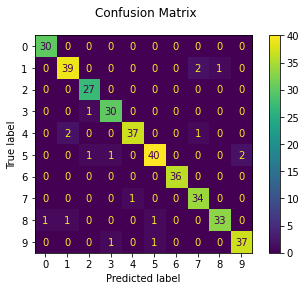

Confusion matrix:
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  2  1  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  1 30  0  0  0  0  0  0]
 [ 0  2  0  0 37  0  0  1  0  0]
 [ 0  0  1  1  0 40  0  0  0  2]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  1  0  0 34  0  0]
 [ 1  1  0  0  0  1  0  0 33  0]
 [ 0  0  0  1  0  1  0  0  0 37]]


In [19]:
#TODO
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
print(f"Confusion matrix:\n{disp.confusion_matrix}")

# Using more complex dataset (60)
MNIST is a dataset of handwritten digits, from 0 to 9, created by LeCun. this dataset consists of 60000 train images and 10000 test images with 28*28 resolution. \
run the cell below to download the dataset.

In [20]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='pandas')

## Q1. Split train and test (5)
Split the train and test sets; remember we have 70000 images, in which 60000 of them are for training and 10000 of them are testset.
Why we don't use whole dataset as training set?

In [34]:
#TODO
[X_train, X_test, y_train, y_test] = train_test_split(X, y, train_size=60000, shuffle=False)

## Q2. Design The Neural network (35)
Split the train and test sets; remember we have 70000 images, in which 60000 of them are for training and 10000 of them are testset.
try to design a neural network with not more than 2 hidden layers. you should reach higher accurecies with simpler networks. 

In [35]:
#TODO
mlp = MLPClassifier(hidden_layer_sizes=(64,32,), 
                    activation='relu', 
                    learning_rate_init=0.005,
                    solver='adam',
                    random_state=2,
                    verbose=True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.30544187
Iteration 2, loss = 0.13514937
Iteration 3, loss = 0.10004988
Iteration 4, loss = 0.08671467
Iteration 5, loss = 0.06788168
Iteration 6, loss = 0.05990603
Iteration 7, loss = 0.05899391
Iteration 8, loss = 0.05465094
Iteration 9, loss = 0.04838193
Iteration 10, loss = 0.04157217
Iteration 11, loss = 0.03771460
Iteration 12, loss = 0.03670417
Iteration 13, loss = 0.03502585
Iteration 14, loss = 0.03388073
Iteration 15, loss = 0.02946718
Iteration 16, loss = 0.03369950
Iteration 17, loss = 0.02985191
Iteration 18, loss = 0.02889473
Iteration 19, loss = 0.03141124
Iteration 20, loss = 0.02338188
Iteration 21, loss = 0.02293443
Iteration 22, loss = 0.02407536
Iteration 23, loss = 0.02451758
Iteration 24, loss = 0.02724161
Iteration 25, loss = 0.01738863
Iteration 26, loss = 0.01878117
Iteration 27, loss = 0.02765085
Iteration 28, loss = 0.02400027
Iteration 29, loss = 0.01844749
Iteration 30, loss = 0.01796955
Iteration 31, loss = 0.02526845
Iteration 32, los

In [37]:
y_pred = mlp.predict(X_test)

print(f"Classification report for classifier {mlp}:\n"f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(64, 32), learning_rate_init=0.005,
              random_state=2, verbose=True):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.95      0.98      0.97       892
           6       0.96      0.98      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000




#### Note: Answer this part if your loss is abnormal:
Why do you think loss is abnormal and what solution do you suggest? \
Print pixel values of an image from dataset; what is the max and min of these values? Try normalizing the data (pixel values) by mapping them to [0,1] range.


In [38]:
#TODO
import numpy as np
X = X / np.max(np.max(X))

c:\Users\Mehran\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [39]:
[X_train, X_test, y_train, y_test] = train_test_split(X, y, train_size=60000)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(32,16,), 
                    activation='relu', 
                    solver='adam',
                    learning_rate_init= 0.005,
                    verbose=True)
import warnings
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.36747864
Iteration 2, loss = 0.18115554
Iteration 3, loss = 0.14658184
Iteration 4, loss = 0.12578674
Iteration 5, loss = 0.11005770
Iteration 6, loss = 0.09713678
Iteration 7, loss = 0.08552166
Iteration 8, loss = 0.07932241
Iteration 9, loss = 0.07632901
Iteration 10, loss = 0.06816625
Iteration 11, loss = 0.06593578
Iteration 12, loss = 0.06085729
Iteration 13, loss = 0.05691733
Iteration 14, loss = 0.05537955
Iteration 15, loss = 0.05225552
Iteration 16, loss = 0.05438882
Iteration 17, loss = 0.05067661
Iteration 18, loss = 0.04563334
Iteration 19, loss = 0.04342251
Iteration 20, loss = 0.04233084
Iteration 21, loss = 0.04161970
Iteration 22, loss = 0.03701167
Iteration 23, loss = 0.03848542
Iteration 24, loss = 0.03872923
Iteration 25, loss = 0.03496555
Iteration 26, loss = 0.03109869
Iteration 27, loss = 0.03025755
Iteration 28, loss = 0.03499889
Iteration 29, loss = 0.03581541
Iteration 30, loss = 0.03186422
Iteration 31, loss = 0.02679253
Iteration 32, los

## Q3. Accuracy (5)
Print train and test accuracy. According to these results, how can we conclude the model has overfitted or not?

answer: if train accuracy was high but test set accuracy was low, overfitting happened

In [40]:
#TODO
y_pred = mlp.predict(X_test)
print(f"Classification report for classifier {mlp}:\n"f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(32, 16), learning_rate_init=0.005,
              verbose=True):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       968
           1       0.98      0.98      0.98      1111
           2       0.94      0.97      0.96      1000
           3       0.96      0.93      0.94      1012
           4       0.97      0.97      0.97      1016
           5       0.93      0.97      0.95       962
           6       0.97      0.98      0.97       964
           7       0.98      0.95      0.97      1026
           8       0.95      0.95      0.95       974
           9       0.97      0.94      0.96       967

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000




Plot the confusion matrix:

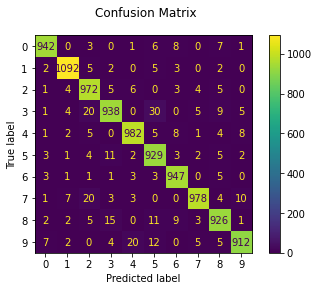

Confusion matrix:
[[ 942    0    3    0    1    6    8    0    7    1]
 [   2 1092    5    2    0    5    3    0    2    0]
 [   1    4  972    5    6    0    3    4    5    0]
 [   1    4   20  938    0   30    0    5    9    5]
 [   1    2    5    0  982    5    8    1    4    8]
 [   3    1    4   11    2  929    3    2    5    2]
 [   3    1    1    1    3    3  947    0    5    0]
 [   1    7   20    3    3    0    0  978    4   10]
 [   2    2    5   15    0   11    9    3  926    1]
 [   7    2    0    4   20   12    0    5    5  912]]


In [41]:
#TODO
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
plt.show()
print(f"Confusion matrix:\n{disp.confusion_matrix}")

### Q4. Plotting the MLP coefficeints (15pts)
Here, we try to plot coefficients of the neural network.

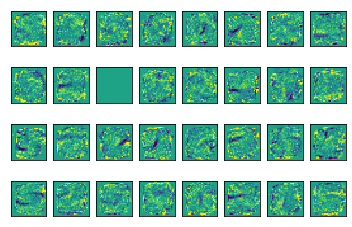

<Figure size 432x288 with 0 Axes>

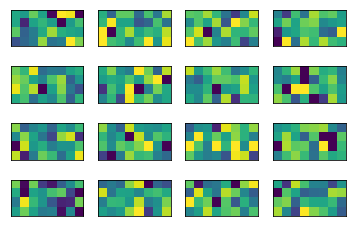

<Figure size 432x288 with 0 Axes>

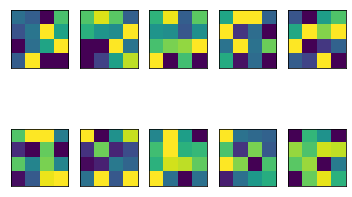

In [42]:
#TODO

fig, axes = plt.subplots(4, 8)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28),  vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

plt.figure()
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[1].min(), mlp.coefs_[1].max()
for coef, ax in zip(mlp.coefs_[1].T, axes.ravel()):
    ax.matshow(coef.reshape(4, 8),  vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

plt.figure()
fig, axes = plt.subplots(2, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[2].min(), mlp.coefs_[2].max()
for coef, ax in zip(mlp.coefs_[2].T, axes.ravel()):
    ax.matshow(coef.reshape(4, 4),  vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

# Optional: Deep neural networks! (optional: 20)
In recent years, deep neural networks has attracted so much attention because of their great results and ease of development.  Deep learning is a class of machine learning algorithms that uses multiple layers to progressively extract higher-level features from the raw input. For example, in image processing, lower layers may identify edges, while higher layers may identify the concepts relevant to a human such as digits or letters or faces. \
There are two important libraries which we use to develop neural network: 1.Tensorflow  2.Pytorch \
Here we want to use keras (an interface for tensorflow) because of its simlpicity.

In this part, we don't want to guide you and tell the steps of designing a neural network, because you've learned it already in the previous parts! we just explain the problem: 
Develop a MLP to classify Fashion Cifar10 with more than 80 percent accuracy!


In [37]:
from keras.datasets import cifar10
import numpy as np
(trainX, trainY), (testX, testY) = cifar10.load_data()

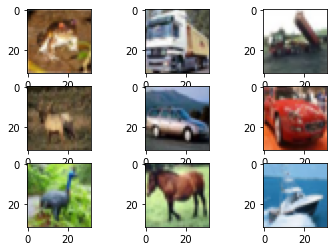

In [38]:
#TODO

plt.figure()
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(trainX[i])
plt.show()


In [39]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

clf = Sequential()
clf.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
clf.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
clf.add(MaxPooling2D((2, 2)))
clf.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
clf.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
clf.add(MaxPooling2D((2, 2)))
clf.add(Flatten())
clf.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
clf.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
clf.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
trainX_norm = trainX_norm / 255.0
testX_norm = testX_norm / 255.0

#trainX_norm = trainX_norm.reshape(len(trainX_norm), -1)
#testX_norm = testX_norm.reshape(len(testX_norm), -1)

#clf = MLPClassifier()
testX_norm = np.append(testX_norm, trainX_norm[:10000], axis=0)


trainY = to_categorical(trainY)
testY = to_categorical(testY)
testY = np.append(testY, trainY[:10000], axis=0)


### don't run cell bellow !!! (it takes hours to run...)

In [ ]:
clf.fit(trainX_norm, trainY, epochs=100, batch_size=32, verbose=0)
#clf.save('deepmodel.msf')

In [42]:
from keras.models import load_model
clf = load_model('deepmodel.msf')
_, acc = clf.evaluate(testX_norm, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 84.365
